In [1]:
% pylab inline
import numpy as np
import pandas as pd
import os
import cv2

Populating the interactive namespace from numpy and matplotlib


In [2]:
read_data=pd.read_csv('flickr_logos_27_dataset/flickr_logos_27_dataset_training_set_annotation.txt',sep=" ",header=None)
read_data.drop(read_data.columns[len(read_data.columns)-1], axis=1, inplace=True)

In [3]:
read_data.columns=["ID","labels","random","x1","y1","x2","y2"]

In [4]:
read_data

,ID,labels,random,x1,y1,x2,y2
0,144503924.jpg,Adidas,1,38,12,234,142
1,2451569770.jpg,Adidas,1,242,208,413,331
2,390321909.jpg,Adidas,1,13,5,89,60
3,4761260517.jpg,Adidas,1,43,122,358,354
4,4763210295.jpg,Adidas,1,83,63,130,93
5,4763210295.jpg,Adidas,1,91,288,125,306
6,4763210295.jpg,Adidas,1,182,63,229,94
7,4763210295.jpg,Adidas,1,192,291,225,306
8,4763210295.jpg,Adidas,1,285,61,317,79
9,4763210295.jpg,Adidas,1,285,298,324,329


In [5]:
x=read_data.ID
y=read_data["labels"]
x1=read_data.x1
x2=read_data.x2
y1=read_data.y1
y2=read_data.y2



In [6]:
def crop_image(img_path,x1,y1,x2,y2):
    img=imread(img_path)
    image=cv2.rectangle(img, (x1, y1), (x2, y2), (255,0,0), 2)
        
    h=y2-y1
    w=x2-x1
    crop_img = img[y1:y1+h, x1:x1+w]
    
    return crop_img

Original Image


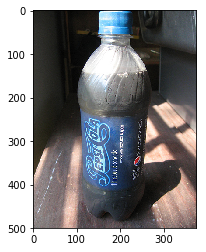

Cropped Image


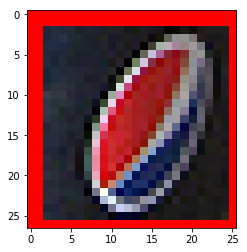

In [7]:
import cv2
import random
import matplotlib.pyplot as plt
i=random.randint(0,x.shape[0])
img_path=os.path.join("flickr_logos_27_dataset/flickr_logos_27_dataset_images",x[i])
crop_img=crop_image(img_path,x1[i],y1[i],x2[i],y2[i])

print "Original Image"
plt.imshow(imread(img_path))
plt.show()

print "Cropped Image"
plt.imshow(crop_img)
plt.show()

In [8]:
from scipy.misc import *

temp=[]
label=[]
for index, row in read_data.iterrows():
    img_path=os.path.join('flickr_logos_27_dataset/flickr_logos_27_dataset_images',row["ID"])
    #print row["x1"],row["y1"],row["x2"],row["y2"]
    img=crop_image(img_path,row["x1"],row["y1"],row["x2"],row["y2"])
    try:
        img=imresize(img,(16,16))
    except:
        continue
    img=img.astype('float32')
    temp.append(img)
    label.append(row["labels"])

import numpy as np

data=np.stack(temp)
labeled_data=np.stack(label)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  # Remove the CWD from sys.path while we load stuff.


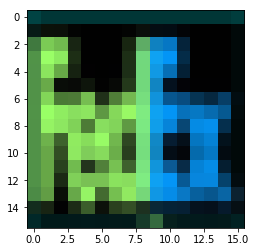

Fedex


In [9]:
plt.imshow(data[1244])
plt.show()
print labeled_data[1244]

In [10]:
print data.shape
print labeled_data.shape

(4531, 16, 16, 3)
(4531,)


In [11]:
normalized_data=data/255

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

# Loop through the splits (only one)
for train_indices, test_indices in splitter.split(normalized_data, labeled_data):
    # Select the train and test data
    x_train, y_train = normalized_data[train_indices], labeled_data[train_indices]
    x_test, y_test = normalized_data[test_indices], labeled_data[test_indices]


In [13]:
from sklearn.preprocessing import LabelEncoder
import keras
lb = LabelEncoder()
train_labels = lb.fit_transform(y_train)
y_train = keras.utils.np_utils.to_categorical(train_labels)

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [14]:
print x_train.shape
print y_train.shape
print x_test.shape
print y_test.shape

(3624, 16, 16, 3)
(3624, 27)
(907, 16, 16, 3)
(907,)


In [15]:
from keras.models import Sequential
from keras.layers import *

model=Sequential()
model.add(Conv2D(16,(3,3),padding='same',activation='relu',input_shape=(16,16,3)))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(27,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
from keras.preprocessing.image import ImageDataGenerator 
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
vertical_flip=False) # randomly flip images

In [17]:
gen_flow=datagen.flow(x_train,y_train,batch_size=32,seed=0)

In [18]:
model.fit_generator(gen_flow,steps_per_epoch=len(x_train) / 128, epochs=150)

Epoch 1/150
28/28 [==============================] - 4s - loss: 3.2472 - acc: 0.0647     
Epoch 2/150
28/28 [==============================] - 3s - loss: 2.9578 - acc: 0.1808     
Epoch 3/150
28/28 [==============================] - 4s - loss: 2.6778 - acc: 0.2333     
Epoch 4/150
28/28 [==============================] - 4s - loss: 2.4285 - acc: 0.3069     
Epoch 5/150
28/28 [==============================] - 4s - loss: 2.0771 - acc: 0.4162     
Epoch 6/150
28/28 [==============================] - 3s - loss: 1.8802 - acc: 0.4498     
Epoch 7/150
28/28 [==============================] - 3s - loss: 1.8795 - acc: 0.4978     
Epoch 8/150
28/28 [==============================] - 3s - loss: 1.7432 - acc: 0.4967     
Epoch 9/150
28/28 [==============================] - 2s - loss: 1.6120 - acc: 0.5369     
Epoch 10/150
28/28 [==============================] - 4s - loss: 1.4029 - acc: 0.5848     
Epoch 11/150
28/28 [==============================] - 4s - loss: 1.3848 - acc: 0.6060     
Epoch 12

28/28 [==============================] - 3s - loss: 0.2442 - acc: 0.9196     
Epoch 92/150
28/28 [==============================] - 3s - loss: 0.2449 - acc: 0.9174     
Epoch 93/150
28/28 [==============================] - 3s - loss: 0.2468 - acc: 0.9241     
Epoch 94/150
28/28 [==============================] - 4s - loss: 0.3046 - acc: 0.9007     
Epoch 95/150
28/28 [==============================] - 4s - loss: 0.3130 - acc: 0.8973     
Epoch 96/150
28/28 [==============================] - 4s - loss: 0.2008 - acc: 0.9386     
Epoch 97/150
28/28 [==============================] - 3s - loss: 0.2612 - acc: 0.9219     
Epoch 98/150
28/28 [==============================] - 4s - loss: 0.2011 - acc: 0.9341     
Epoch 99/150
28/28 [==============================] - 4s - loss: 0.2936 - acc: 0.9118     
Epoch 100/150
28/28 [==============================] - 3s - loss: 0.2683 - acc: 0.9141     
Epoch 101/150
28/28 [==============================] - 4s - loss: 0.2085 - acc: 0.9353     
Epoch 102/

In [19]:
model.save_weights('my_model_weights.h5')

In [20]:
pred = model.predict_classes(x_test)
print np.unique(pred)
pred = lb.inverse_transform(pred)

864/907 [===========================>..] - ETA: 0s[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]


/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [21]:
from sklearn.metrics import accuracy_score

accuracy_score(pred,y_test)

0.9592061742006616